In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [2]:
# %matplotlib widget

In [3]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc
from BBP_RTQC_global_vars import *
from BBP_RTQC_paths import *
import os
import subprocess
import pandas as pd

In [4]:
def robstd(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [8]:
# find all pickled results
fn_pkl = glob.glob("plots/*/*pkl")
# fn_pkl = glob.glob("plots/*/*pkl.MDQC3_HDV400")

all_PROFS = []
for fn in fn_pkl:
    print(fn)
    infile = open(fn,'rb')
    tmp_all_PROFS = pickle.load(infile)
    infile.close()
    
    all_PROFS.extend(tmp_all_PROFS)


plots/5905376/aoml_BD5905376.pkl
plots/6903093/coriolis_BR6903093.pkl
plots/2902120/incois_BR2902120.pkl
plots/5906296/aoml_BR5906296.pkl
plots/5906031/aoml_BR5906031.pkl
plots/6903550/coriolis_BR6903550.pkl
plots/6902743/coriolis_BD6902743.pkl
plots/2902114/incois_BD2902114.pkl
plots/6901649/coriolis_BD6901649.pkl
plots/6901656/coriolis_BR6901656.pkl
plots/6901511/coriolis_BD6901511.pkl
plots/6901866/coriolis_BD6901866.pkl
plots/6903570/coriolis_BR6903570.pkl
plots/5906307/aoml_BR5906307.pkl
plots/6901183/bodc_BR6901183.pkl
plots/7900561/coriolis_BR7900561.pkl
plots/2902753/csio_BR2902753.pkl
plots/5906226/aoml_BR5906226.pkl
plots/2902241/incois_BR2902241.pkl
plots/6901860/coriolis_BR6901860.pkl
plots/5906450/aoml_BR5906450.pkl
plots/5904671/aoml_BD5904671.pkl
plots/6901580/coriolis_BD6901580.pkl
plots/6902549/coriolis_BR6902549.pkl
plots/2902205/incois_BR2902205.pkl
plots/2902195/incois_BR2902195.pkl
plots/5904478/aoml_BD5904478.pkl
plots/5904858/aoml_BD5904858.pkl
plots/4903625/aoml

plots/5905636/aoml_BD5905636.pkl
plots/6902826/coriolis_BR6902826.pkl
plots/5906293/aoml_BR5906293.pkl
plots/2902272/incois_BR2902272.pkl
plots/5905988/aoml_BR5905988.pkl
plots/5905104/aoml_BR5905104.pkl
plots/2902299/incois_BR2902299.pkl
plots/5906310/aoml_BR5906310.pkl
plots/6903551/coriolis_BD6903551.pkl
plots/6901657/coriolis_BD6901657.pkl
plots/5905981/aoml_BD5905981.pkl
plots/6901764/coriolis_BD6901764.pkl
plots/5904767/aoml_BD5904767.pkl
plots/2902264/incois_BR2902264.pkl
plots/3902120/coriolis_BR3902120.pkl
plots/4903622/aoml_BR4903622.pkl
plots/5905369/aoml_BD5905369.pkl
plots/5904474/aoml_BD5904474.pkl
plots/5906342/aoml_BR5906342.pkl
plots/5904476/aoml_BD5904476.pkl
plots/5906206/aoml_BR5906206.pkl
plots/5905165/csiro_BR5905165.pkl
plots/5904396/aoml_BD5904396.pkl
plots/5905984/aoml_BR5905984.pkl
plots/7900586/coriolis_BR7900586.pkl
plots/5904185/aoml_BD5904185.pkl
plots/6901472/coriolis_BD6901472.pkl
plots/6901495/coriolis_BD6901495.pkl
plots/7900587/coriolis_BR7900587.pkl


plots/6903024/coriolis_BR6903024.pkl
plots/6901767/coriolis_BD6901767.pkl
plots/2902087/incois_BD2902087.pkl
plots/6902742/coriolis_BR6902742.pkl
plots/6901522/coriolis_BD6901522.pkl
plots/5904182/aoml_BD5904182.pkl
plots/5906026/aoml_BR5906026.pkl
plots/3902125/coriolis_BR3902125.pkl
plots/6902019/coriolis_BR6902019.pkl
plots/5905229/jma_BR5905229.pkl
plots/2902175/incois_BR2902175.pkl
plots/4901805/coriolis_BR4901805.pkl
plots/5904686/aoml_BD5904686.pkl
plots/5906219/aoml_BR5906219.pkl
plots/5903649/csiro_BD5903649.pkl
plots/5905167/csiro_BR5905167.pkl
plots/6901575/coriolis_BD6901575.pkl
plots/5906002/aoml_BR5906002.pkl
plots/2902124/incois_BD2902124.pkl
plots/5903660/csiro_BD5903660.pkl
plots/6901583/coriolis_BD6901583.pkl
plots/5905078/aoml_BD5905078.pkl
plots/5904845/aoml_BR5904845.pkl
plots/6902967/coriolis_BD6902967.pkl
plots/5903717/aoml_BD5903717.pkl
plots/5904982/aoml_BD5904982.pkl
plots/5906005/aoml_BD5906005.pkl
plots/5906237/aoml_BR5906237.pkl
plots/5906297/aoml_BR5906297

In [9]:
# extract all profiles from list of dictionaries (https://stackoverflow.com/questions/7271482/getting-a-list-of-values-from-a-list-of-dicts) 

a = [d.get("PRES", "NaN") for d in all_PROFS if 'PRES' in d]
all_PRES = np.asarray(np.hstack(a), dtype=np.float16)

a = [d.get("BBP700", "NaN") for d in all_PROFS if 'BBP700' in d]
all_BBP700 = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_flag", "NaN") for d in all_PROFS if 'BBP700_QC_flag' in d]
all_BBP700_QC_flag = np.asarray(np.hstack(a), dtype=np.uint8)

a = [d.get("BBP700_QC_1st_failed_test", "NaN") for d in all_PROFS ]#if 'BBP700_QC_1st_failed_test' in d]
all_BBP700_1st_fail = np.asarray(np.hstack(a))

all_fail = dict.fromkeys(tests.keys())
for ikey in all_fail.keys():
    a = [d.get(ikey, "NaN") for d in all_BBP700_1st_fail if ikey in d]
    all_fail[ikey] = np.asarray(np.hstack(a))


In [10]:
# prof = all_PROFS[0]
# prof['PRES'].max()

In [11]:
all_WMO = [];
all_LAT = [];
all_LON = [];
all_SENSOR_MODEL = [];
all_maxPRES = []
# all_SENSOR_MAKER = [];
all_DK = [];
all_S = [];
all_KHI = []

iprof = 0
iTotNoProf = 0
for prof in all_PROFS:
    if "iWMO" in prof: # this is the last record of this float
#         ipdb.set_trace()
        all_WMO.extend([ prof['iWMO'] ]*iprof) # NOTE: the "*" operation creates iprof elements of the LIST 
        if type(prof['SENSOR_MODEL'])==str:
            all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'].strip() ]*iprof)
        else:
            all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'].item().strip() ]*iprof)
#         all_SENSOR_MAKER.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_DK.extend([ prof['DARK_BACKSCATTERING700'] ]*iprof)
        all_S.extend([ prof['SCALE_BACKSCATTERING700'] ]*iprof)
        all_KHI.extend([ prof['KHI_BACKSCATTERING700'] ]*iprof)
        iprof = 0
    else:
        all_LAT.extend([ prof['LAT'] ]*len(prof['PRES']))
        all_LON.extend([ prof['LON'] ]*len(prof['PRES']))
        all_maxPRES.extend([ prof['PRES'].max() ]*len(prof['PRES']))
        
        iprof = iprof + len(prof['PRES']) # this is to count how many BBP values there are for each profile

all_WMO = np.asarray(all_WMO)   
all_SENSOR_MODEL = np.asarray(all_SENSOR_MODEL)   
# # all_SENSOR_MAKER = np.asarray(all_SENSOR_MODEL)   
# # all_SENSOR_SERIAL_NO = np.asarray(all_SENSOR_MODEL)   
all_maxPRES = np.asarray(all_maxPRES, dtype=np.float16)
all_DK = np.asarray(all_DK, dtype=np.float16)
all_S = np.asarray(all_S)
all_KHI = np.asarray(all_KHI, dtype=np.float16)

all_LAT = np.asarray(all_LAT, dtype=np.float16) 
all_LON = np.asarray(all_LON, dtype=np.float16) 

In [12]:
all_maxPRES = np.asarray(all_maxPRES, dtype=np.float16)

In [13]:
import sys
print( "%.2f Mb" % ( sys.getsizeof(all_maxPRES)*(9.537*1e-7) ) )
print(set(all_SENSOR_MODEL))



60.54 Mb
{'MCOMS_FLBBCD', 'no metadata', 'ECO_FLBB2', 'ECO_FLBB', 'ECO_FLBB_AP2', 'ECO_FLBBCD_AP2', 'ECO_BB3', 'ECO_FLBBCD', 'ECO_FLBB_2K', 'MCOMS_FLBB2'}


In [14]:
# # extract calibration coefficients
# print(all_BBP700.size)
# np.unique(all_maxPRES)
# # plt.hist(all_DK[all_DK<120], 100);

In [15]:
# extract some stats
TotNoFloats = np.unique(all_WMO).shape[0]
TotNoProfiles = np.unique(all_LAT).shape[0]

In [16]:
# extract float parameters and create arrays that match the profile lengths

# for iprof,tmp  in enumerate(all_PROFS):
#     print(tmp.keys())



In [17]:
iQCge3 = np.where(all_BBP700_QC_flag>=3)[0]
iQCle2 = np.where(all_BBP700_QC_flag<=2)[0]

# # find indices of flagged points
iA = np.where(all_fail['A'][iQCge3]!='0')[0] # Global range
iA2 = np.where(all_fail['A2'][iQCge3]!='0')[0] # Global range
iB = np.where(all_fail['B'][iQCge3]!='0')[0] # Noisy
iC = np.where(all_fail['C'][iQCge3]!='0')[0] # High deep values
# iD = np.where(all_fail['D'][iQCge3]!='0')[0] # Surface hook 
iE = np.where(all_fail['E'][iQCge3]!='0')[0] # Missing values
# iF = np.where(all_fail['F'][iQCge3]!='0')[0] # Negative non-surface
iG = np.where(all_fail['G'][iQCge3]!='0')[0] # Parking hook
# iH = np.where(all_fail['H'][iQCge3]!='0')[0] # Stuck Value

iall = np.asarray(np.hstack([iA, iA2, iB, iC, iE, iG]))


itot = all_BBP700.size


In [18]:
# print(len(iA)/itot, len(iB)/itot, len(iC)/itot, len(iD)/itot, len(iE)/itot, len(iF)/itot, len(iG)/itot, (itot - len(iQCge3))/itot, len(iQCle2)/itot)
# print([len(all_BBP700_QC_flag), len(all_BBP700_1st_fail)])
from tabulate import tabulate
print(tabulate([
                [tests['A'], len(iA)/itot*100], 
                [tests['A2'], len(iA2)/itot*100], 
                [tests['B'], len(iB)/itot*100], 
                [tests['C'], len(iC)/itot*100], 
#                 [tests['D'], len(iD)/itot*100], 
                [tests['E'], len(iE)/itot*100], 
#                 [tests['F'], len(iF)/itot*100], 
                [tests['G'], len(iG)/itot*100 ],
#                 [tests['H'], len(iH)/itot*100 ],
                ['QC<=2',    len(iQCle2)/itot*100 ],                
                ['QC>=3',    len(iQCge3)/itot*100 ],
                ['--------------------', ],
                ['Tot no of records', itot ],
                ['Tot no of profiles', TotNoProfiles ],
                ['Tot no of floats', TotNoFloats ],
                ], 
                headers=['Test', '%']
                ))

Test                                %
--------------------  ---------------
Global Range >0           2.04992
Global Range <0           1.09755
Noisy Profile             1.75328
High-Deep Value           7.52693
Missing Data              2.01319
Parking Hook              0.359966
QC<=2                    90.3973
QC>=3                     9.60266
--------------------
Tot no of records         3.17418e+07
Tot no of profiles    65385
Tot no of floats        629


In [ ]:
# find all possible pairs of tests for single-point flagging tests, based on points
list_tests = list(tests)
ovrlp = np.empty((len(list_tests), len(list_tests)))
for i1,ip1 in enumerate(list_tests):
    for i2,ip2 in enumerate(list_tests):
        ilbl1 = "i" + list_tests[i1]
        ilbl2 = "i" + list_tests[i2]
        
        if i1>=i2:
            if eval(ilbl1).shape[0]!=0:
                ovrlp[i1, i2] = np.intersect1d(eval(ilbl1), eval(ilbl2)).shape[0] / eval(ilbl1).shape[0]*100
            else:
                ovrlp[i1, i2] = np.nan
#             print(">=")
        elif i1<i2:
            if eval(ilbl1).shape[0]!=0:
                ovrlp[i1, i2] = np.intersect1d(eval(ilbl1), eval(ilbl2)).shape[0] / eval(ilbl1).shape[0]*100
            else:
                ovrlp[i1, i2] = np.nan
    

In [ ]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ovrlp, vmin=0, vmax=100, cmap=plt.get_cmap('binary', 40))
fig.colorbar(cax)
# lbls = ["GR>0", "GR<0*", "NP*", "HDV*", "SH", "MD*", "NNS", "PH", "SV*"] #list(tests.values()) 
lbls = ["GR>0", "GR<0*", "NP*", "HDV*", "MD*", "PH"] #list(tests.values()) 
xaxis = np.arange(len(lbls))
ax.set_xticks(xaxis)
ax.set_xticklabels(lbls, fontsize=10)
ax.set_yticks(xaxis)
ax.set_yticklabels(lbls, fontsize=10)

plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="left", va="center", rotation_mode="anchor")

for (i,j), z in np.ndenumerate(ovrlp):
    if (np.round(z)>1) & (z!=100):
        ax.text(j, i, "%.0f" % (z), ha="center", va="center", fontsize=10, color="r")
#         print(z)

In [ ]:
# create output directory if it does not exist
from pathlib import Path
Path('plots/DACs/').mkdir(parents=True, exist_ok=True)

In [ ]:
def plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2, DAC, YLIM=2000):
    f, axs = plt.subplots(1,2,figsize=(16,8))

    xmin = 0.0002
    xmax = 0.01
    xoff = 0.0003
    
    ax1 = axs[1]
    ax1.plot(BBP_QCle2+xoff, PRES_QCle2, 'ko', ms=3, alpha=0.04, zorder=60) # this is to plot every iN data point
    ax1.plot((xoff, xoff), (-50, YLIM), 'k--')
    ax1.set_ylim([-5, YLIM])
    ax1.set_xlim([xmin, xmax])
    ax1.invert_yaxis()
    ax1.set_xscale('log')
    ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
#     ax1.set_ylabel('PRES [dbars]', fontweight='bold')
    ax1.set_title('QC<=2', fontweight='bold')
    xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
    xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
    plt.setp(ax1, xticks=xts, xticklabels=xtklbls)
    plt.rcParams.update({'font.size': 20})
   
    ax2 = axs[0]
    ax2.plot(BBP_QC+xoff, PRES_QC, 'ko', ms=3, alpha=0.04, zorder=60) # this is to plot every iN data point
    ax2.plot((xoff, xoff), (-50, YLIM), 'k--')
    ax2.set_ylim([-5, YLIM])
    ax2.set_xlim([xmin, xmax])
    ax2.invert_yaxis()
    ax2.set_xscale('log')
    ax2.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
    ax2.set_ylabel('PRES [dbars]', fontweight='bold')
    ax2.set_title('All', fontweight='bold')
    plt.setp(ax2, xticks=xts, xticklabels=xtklbls)
    plt.rcParams.update({'font.size': 20})

    f.savefig("plots/DACs/" + DAC + "_all_vs_QCle2.png")

    gc.collect()

In [ ]:
iN = 10

BBP_QCle2 = all_BBP700[iQCle2][::iN]
PRES_QCle2 = all_PRES[iQCle2][::iN]
BBP_QC = all_BBP700[:][::iN]
PRES_QC = all_PRES[:][::iN]
plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2, "ALL")

In [ ]:
#plot top 400 dbars of the profile
iN = 10

BBP_QCle2 = all_BBP700[iQCle2][::iN]
PRES_QCle2 = all_PRES[iQCle2][::iN]
BBP_QC = all_BBP700[:][::iN]
PRES_QC = all_PRES[:][::iN]
plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2, "ALL", YLIM=600)

In [21]:
# # %matplotlib widget
iN = 100#int(iall.size/3.) # step size to make plotting faster
# fig = plt.figure(figsize=(20,10))
# xmin = 0.0001
# xmax = 0.1
# xoff = 0.0003
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[:][::iN] + xoff, all_PRES[:][::iN], 'ro', ms=3, mfc='r', alpha=0.3)
# ax1.plot(all_BBP700[iQCle2][::iN] + xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.03)
# ax1.plot((xoff, xoff), (-50, 2000), 'k--')
# ax1.set_ylim([-50, 2000])
# # ax1.set_xlim([-0.0003, 0.1])
# ax1.set_xlim([xmin, xmax])
# ax1.invert_yaxis()
# ax1.set_xscale('log')
# ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
# ax1.set_ylabel('PRES [dbars]', fontweight='bold')
# xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1])+xoff)
# xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
# plt.xticks(xts, xtklbls)
# plt.rcParams.update({'font.size': 20})


# gc.collect()
    

In [22]:
def plot_iQC(x1, x2, y1, y2, test, ALPHA=0.03):


    # %matplotlib widget
    fig = plt.figure(figsize=(20,10))
    xmin = 0.0001
    xmax = 0.1
    xoff = 0.0003
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(x1 + xoff, y1, 'o', ms=3, alpha=0.03, color='b')
    ax1.plot(x2 + xoff, y2, 'ro', ms=3, alpha=ALPHA)

    ax1.plot((xoff, xoff), (-50, 2000), 'k--')

    ax1.set_ylim([-50, 2000])
    # ax1.set_xlim([-0.0003, 0.1])
    ax1.set_xlim([xmin, xmax])
    ax1.invert_yaxis()
    ax1.set_xscale('log')
    ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
    ax1.set_ylabel('PRES [dbars]', fontweight='bold')
    xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1]) + xoff)
    xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
    plt.xticks(xts, xtklbls)
    plt.rcParams.update({'font.size': 20})
    plt.title(test)
    gc.collect()


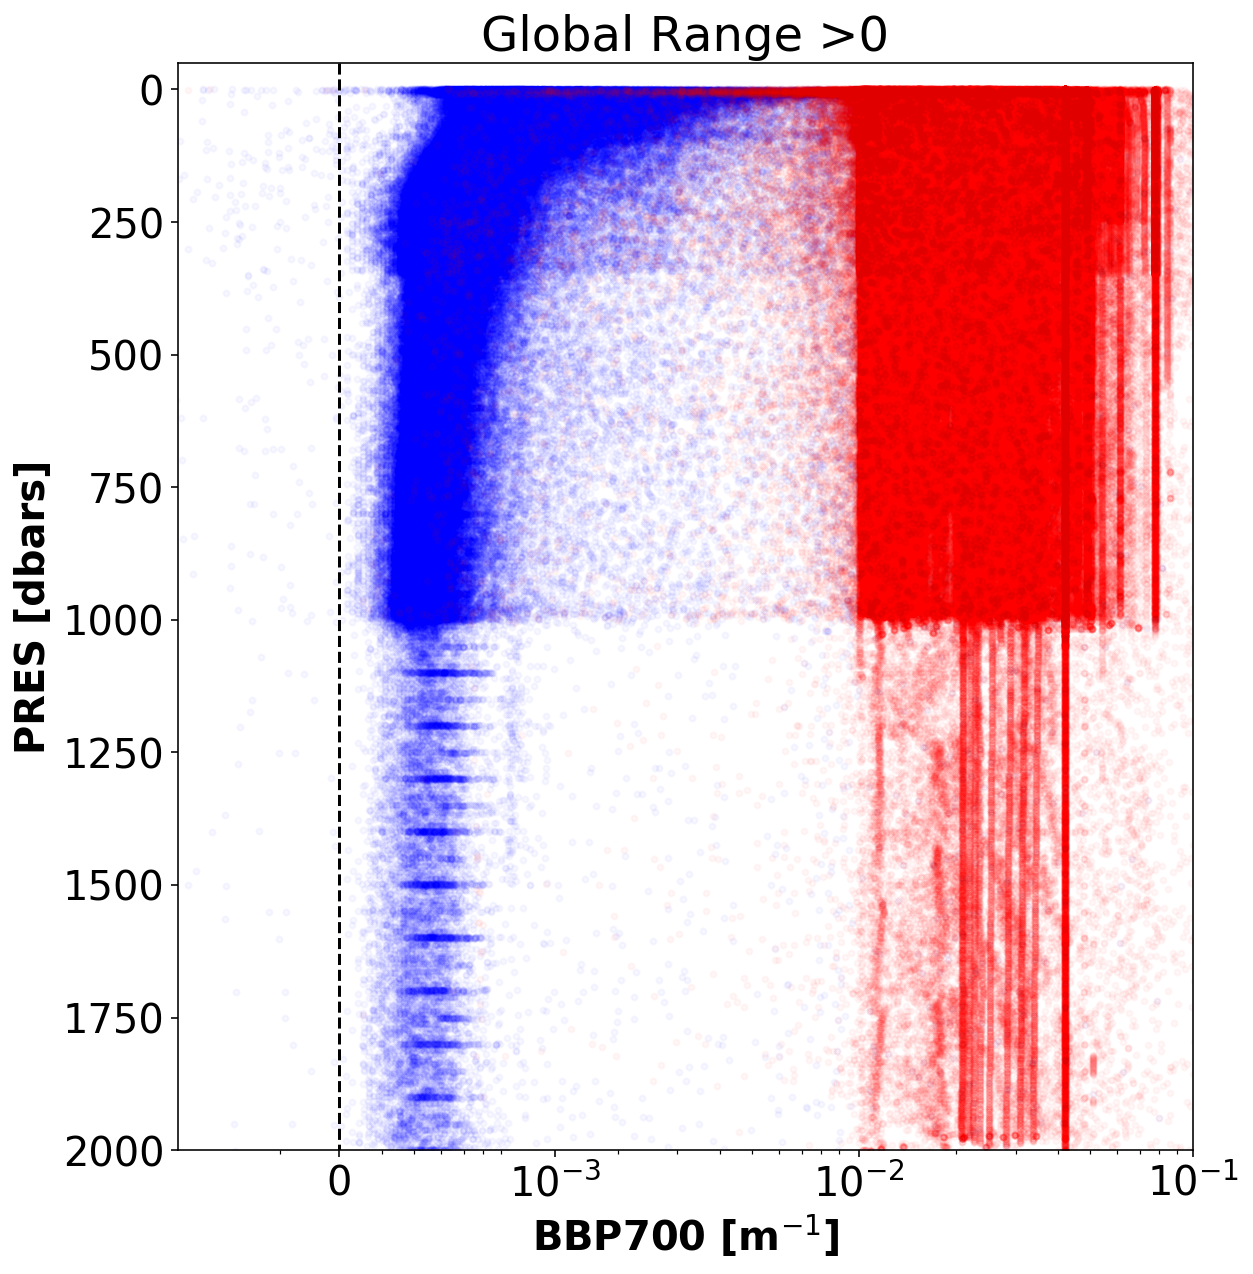

In [23]:
# plots results for Global range test (A)

x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA][::]
plot_iQC(x1, x2, y1, y2, tests['A'])

0

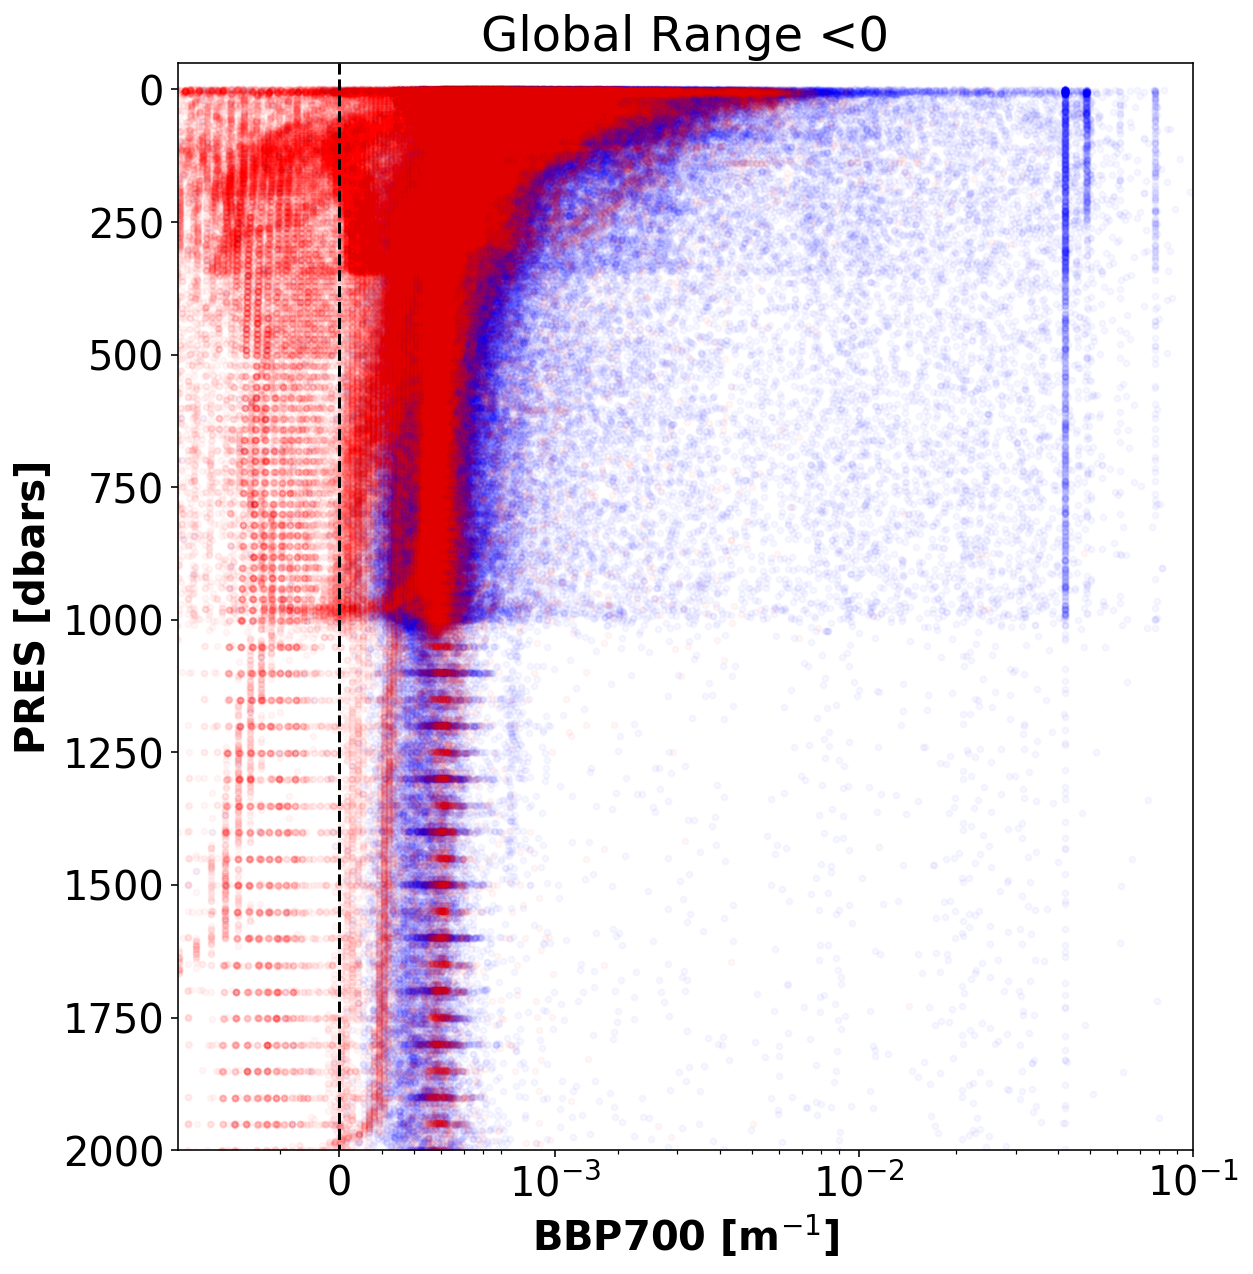

In [24]:
# plots results for Global range test (A)

x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA2][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA2][::]
plot_iQC(x1, x2, y1, y2, tests['A2'])
gc.collect()

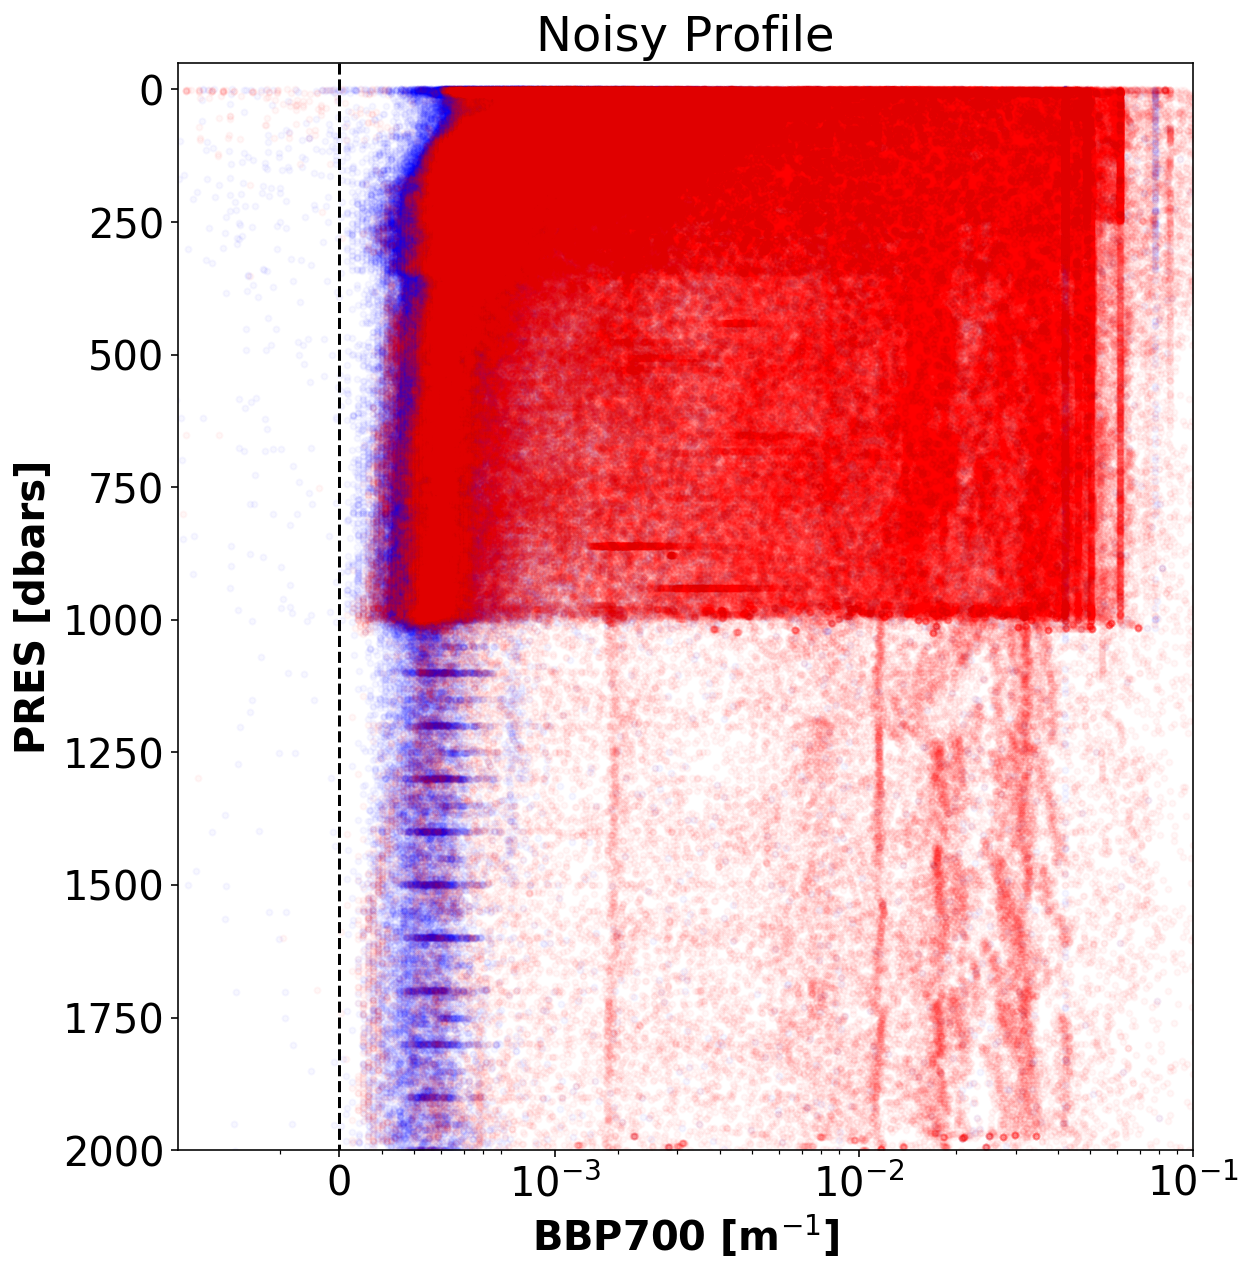

In [25]:
# plots results for test (B)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iB][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iB][::]
plot_iQC(x1, x2, y1, y2, tests['B'])

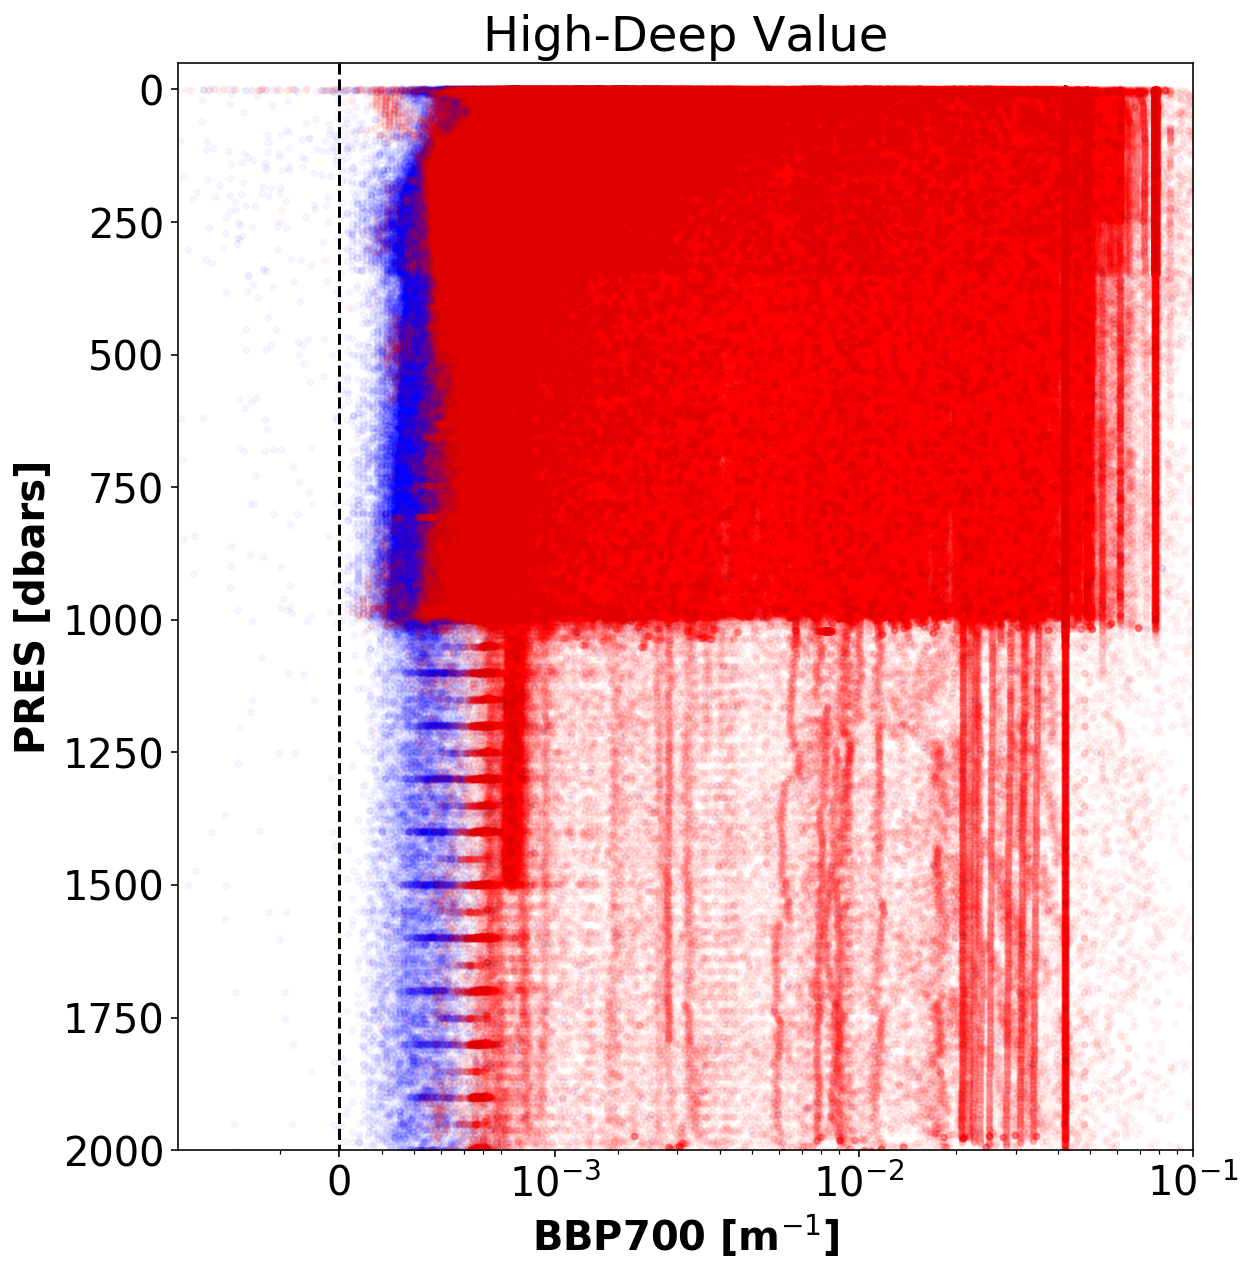

In [26]:
# plots results for test (C)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iC][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iC][::]
plot_iQC(x1, x2, y1, y2, tests['C'])

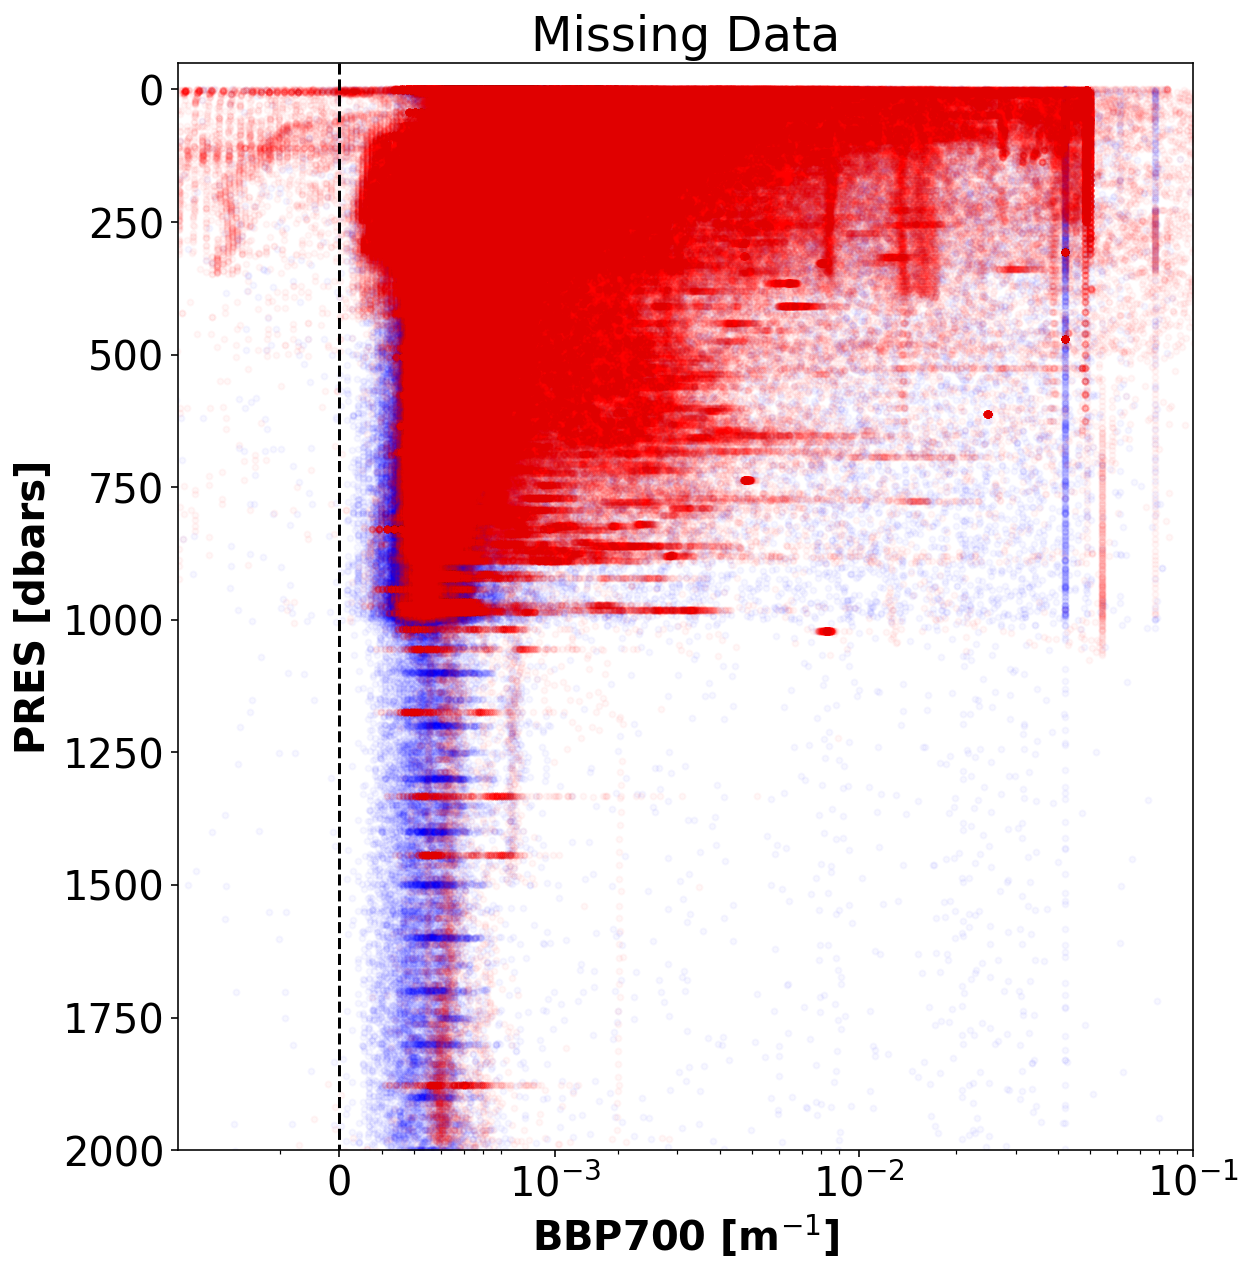

In [27]:
# plots results for test (E)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iE][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iE][::]
plot_iQC(x1, x2, y1, y2, tests['E'])

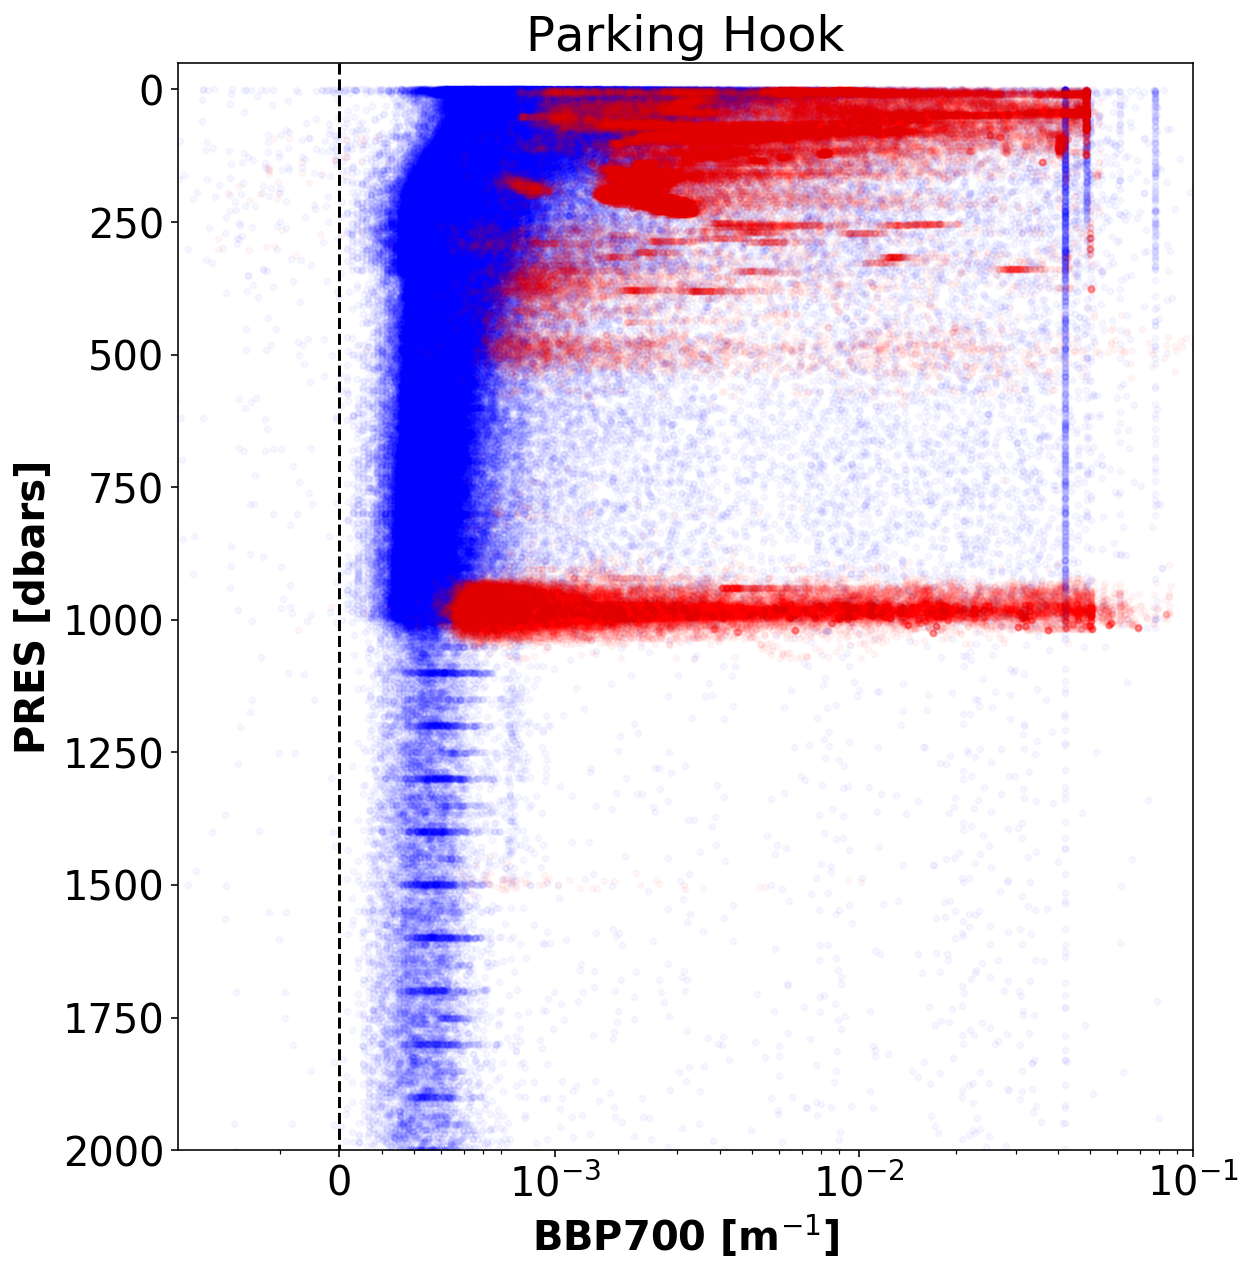

In [28]:
# plots results for test (G)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iG][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iG][::]
plot_iQC(x1, x2, y1, y2, tests['G'])

In [29]:
!ls plots/DACs/

ALL_all_vs_QCle2.png   coriolis_all_vs_QCle2.png  csiro.png
aoml_all_vs_QCle2.png  coriolis.png		  incois_all_vs_QCle2.png
aoml.png	       csio_all_vs_QCle2.png	  incois.png
bodc_all_vs_QCle2.png  csio.png			  jma_all_vs_QCle2.png
bodc.png	       csiro_all_vs_QCle2.png	  jma.png


In [30]:
# # this is to plot profiles from one DAC vs the entire dataset
# DAC = 'csiro'
# iDAC = np.where(pd.Series(all_WMO).str.contains(DAC).values)[0] # select data from given DAC
# iDACqc = np.where(pd.Series(all_WMO[iQCle2]).str.contains(DAC).values)[0] # select data from given DAC
    
    
# iN = 10

# BBP_QC = all_BBP700[:][iDAC][::iN]
# PRES_QC = all_PRES[:][iDAC][::iN]
# BBP_QCle2 = all_BBP700[:][iQCle2][iDACqc][::iN]
# PRES_QCle2 = all_PRES[:][iQCle2][iDACqc][::iN]
# plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2)

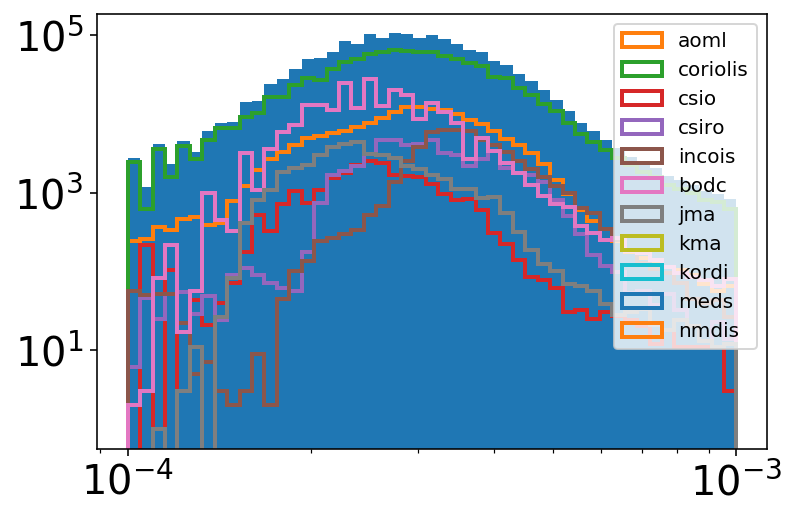

In [31]:
i500 = np.where((all_PRES[iQCle2]<=550) & (all_PRES[iQCle2]>=450))
plt.hist(all_BBP700[iQCle2][i500], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][i500]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][i500][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


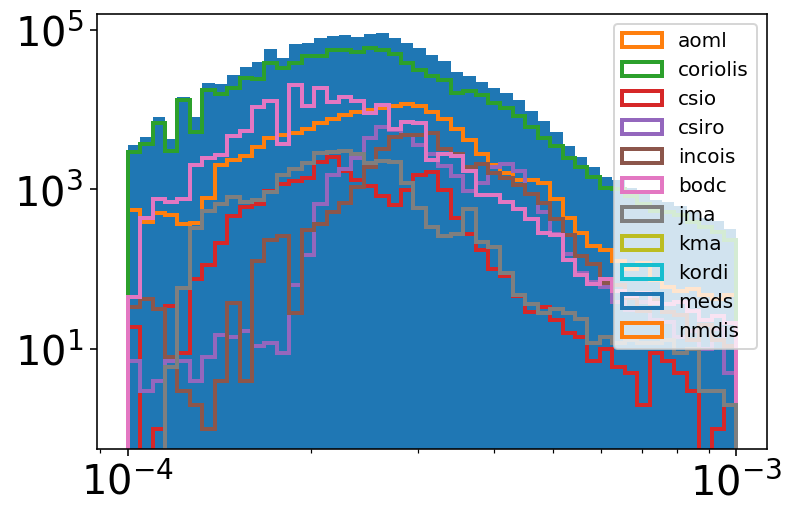

In [32]:
iLT1000 = np.where((all_PRES[iQCle2]<=1000) & (all_PRES[iQCle2]>=900))
plt.hist(all_BBP700[iQCle2][iLT1000], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iLT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iLT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


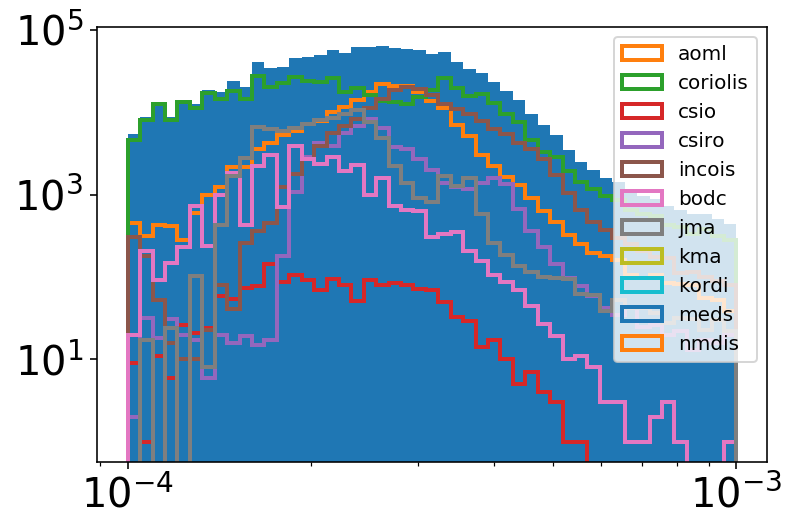

In [33]:

iGT1000 = np.where((all_PRES[iQCle2]>=1000))
plt.hist(all_BBP700[iQCle2][iGT1000], bins=np.logspace(-4,-3, 50));
# plt.gca().set_xticklabels([1e-4, 2e-4, 4e-4, 6e-4, 8e-4, 10e-4], fontsize=20)

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iGT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iGT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)

In [34]:
tests

{'A': 'Global Range >0',
 'A2': 'Global Range <0',
 'B': 'Noisy Profile',
 'C': 'High-Deep Value',
 'E': 'Missing Data',
 'G': 'Parking Hook'}

In [35]:
tests['G'].replace(" ", "_").replace("-", "_")

'Parking_Hook'

In [36]:
# # create dirs with plots for each test
# for icode in tests:

# #     if (icode == "A") | (icode == "A2"):
# #         continue
#     print(icode)
    
#     # create name for directory where the plots will be stored
#     dir_nm = tests[icode].replace(" ", "_").replace("-", "_").replace(">", "gt").replace("<", "lt")
    
#     # create dir with plots 
#     !mkdir -p {DIR_PLOTS + "Tests/" + dir_nm + "/"}
    
#     # delete old files
#     oldB = glob.glob(DIR_PLOTS + "Tests/" + dir_nm + "/*png")
#     [os.remove(i) for i in oldB] ;
    
#     # copy specific-test plots in dir for each test
#     fn = glob.glob(DIR_PLOTS + "[0-9]*/*_" + icode + ".png")
#     for ifn in fn:
#         cmdo = "cp " + ifn + " " + DIR_PLOTS + "Tests/" + dir_nm + "/"
#         print(cmdo)
#         subprocess.run(cmdo, shell=True)
#         if icode == 'B': # for Noisy-profile test also copy raw-data plot
#             ifn0 = ifn[:-5] + "0.png"
#             cmdo0 = "cp " + ifn0 + " " + DIR_PLOTS + "Tests/" + dir_nm + "/"
#             print("     " + cmdo)
#             subprocess.run(cmdo0, shell=True)
    
   

In [37]:
# # create text files with lists of floats and profiles that failed each test
# for icode in tests:
#     print(icode)
    
#     # create name for directory where the plots will be stored
#     dir_nm = tests[icode].replace(" ", "_").replace("-", "_").replace(">", "gt").replace("<", "lt")
    
#     cmdo0 = "ls " + DIR_PLOTS + "Tests/" + dir_nm + "/* > " + DIR_PLOTS + "Tests/failed_" + dir_nm + ".txt"
#     print("     " + cmdo0)
#     subprocess.run(cmdo0, shell=True)



In [38]:
plt.close('all')

In [39]:
import ipdb

colors = ["darkgrey", "lightcoral", "chocolate", "springgreen", "c", "cornflowerblue", "plum", "tan"]
dacs = ['coriolis', 'aoml', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi']

for DAC in dacs: 
    
    print(DAC)

    iDAC = np.where(pd.Series(all_WMO).str.contains(DAC).values)[0] # select data from given DAC
    
    # index of flagged points for this DAC
    iQCge3 = np.where(all_BBP700_QC_flag[iDAC]>=3)[0]
    iQCle2 = np.where(all_BBP700_QC_flag[iDAC]<=2)[0]
    
    # total number of flagged points from this DAC
    itotFlagged = all_BBP700[iDAC[iQCge3]].size
    itot = all_BBP700[iDAC].size
    
    # extract some stats
    TotNoFloats = np.unique(all_WMO[iDAC]).shape[0]
    TotNoProfiles = np.unique(all_LAT[iDAC]).shape[0]    

    if itot==0:
        continue
        
    # # find indices of flagged points
#     iA = np.where(all_fail['A'][iQCge3]!='0')[0].shape[0] / itotFlagged  # Global range >0
#     iA2 = np.where(all_fail['A2'][iQCge3]!='0')[0].shape[0] / itotFlagged # Global range <0
#     iB = np.where(all_fail['B'][iQCge3]!='0')[0].shape[0] / itotFlagged # Noisy profile
#     iC = np.where(all_fail['C'][iQCge3]!='0')[0].shape[0] / itotFlagged # High deep values
#     iD = np.where(all_fail['D'][iQCge3]!='0')[0].shape[0] / itotFlagged # Surface hook 
#     iE = np.where(all_fail['E'][iQCge3]!='0')[0].shape[0] / itotFlagged # Missing values
#     iF = np.where(all_fail['F'][iQCge3]!='0')[0].shape[0] / itotFlagged # Negative non-surface
#     iG = np.where(all_fail['G'][iQCge3]!='0')[0].shape[0] / itotFlagged # Parking hook

    # # find indices of flagged points
    iA = np.where(all_fail['A'][iDAC][iQCge3] != '0')[0] # Global range >0
    iA2 = np.where(all_fail['A2'][iDAC][iQCge3] != '0')[0] # Global range <0
    iB = np.where(all_fail['B'][iDAC][iQCge3] != '0')[0] # Noisy profile
    iC = np.where(all_fail['C'][iDAC][iQCge3] != '0')[0] # High deep values
    iE = np.where(all_fail['E'][iDAC][iQCge3] != '0')[0] # Missing values
    iG = np.where(all_fail['G'][iDAC][iQCge3] != '0')[0] # Parking hook
    

    
# print results
    print(tabulate([
                [tests['A'], iA.size / itotFlagged  *100], 
                [tests['A2'], iA2.size / itotFlagged  *100], 
                [tests['B'], iB.size / itotFlagged  *100], 
                [tests['C'], iC.size / itotFlagged  *100], 
                [tests['E'], iE.size / itotFlagged  *100], 
                [tests['G'], iG.size / itotFlagged  *100 ],
                ['QC<=2',    len(iQCle2)/itot*100 ],                
                ['QC>=3',    len(iQCge3)/itot*100 ],
                ['--------------------', ],
                ['Tot no of records', itot ],
                ['Tot no of profiles', TotNoProfiles ],
                ['Tot no of floats', TotNoFloats ],
                ], 
                headers=['Test', '%']
                ))
    
    print(" ")
    print(" ")
    
    # plot results
    y = [iA, iA2, iB, iC, iE, iG]
    newy = []
    for iy in y:
        newy.append(iy.size / itotFlagged * 100)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    plt.pie(newy, colors = colors, labels = lbls, autopct='%1.f%%', textprops={'fontsize': 10, 'color': 'crimson'})
    plt.title(DAC, fontweight='bold')
    
    plt.savefig("plots/DACs/" + DAC + '.png')
    plt.close('all')
    
    
#     # this is to plot profiles from one DAC vs the entire dataset
#     iDAC = np.where(pd.Series(all_WMO).str.contains(DAC).values)[0] # select data from given DAC
#     iDACqc = np.where(pd.Series(all_WMO[iQCle2]).str.contains(DAC).values)[0] # select data from given DAC

    iN = 10

    BBP_QC = all_BBP700[:][iDAC][::iN]
    PRES_QC = all_PRES[:][iDAC][::iN]
    BBP_QCle2 = all_BBP700[:][iDAC][iQCle2][::iN]
    PRES_QCle2 = all_PRES[:][iDAC][iQCle2][::iN]
    plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2, DAC)
    
#     ipdb.set_trace()
#     break
    plt.close('all')

coriolis
Test                                %
--------------------  ---------------
Global Range >0          13.637
Global Range <0           5.7683
Noisy Profile            11.4059
High-Deep Value          44.7357
Missing Data             54.8956
Parking Hook              2.57363
QC<=2                    80.9319
QC>=3                    19.0681
--------------------
Tot no of records         2.13403e+07
Tot no of profiles    26297
Tot no of floats        240
 
 
aoml
Test                                %
--------------------  ---------------
Global Range >0           1.30686
Global Range <0           5.4859
Noisy Profile             4.95076
High-Deep Value          79.7056
Missing Data             12.6278
Parking Hook              0.0416862
QC<=2                    93.3513
QC>=3                     6.64875
--------------------
Tot no of records         2.88641e+06
Tot no of profiles    10816
Tot no of floats        245
 
 
csio
Test                              %
-------------------- 

In [40]:
# # print(set(all_SENSOR_MODEL))
# # iDAC #= np.where(pd.Series(all_WMO).str.contains(DAC).values)[0]
# # np.where(pd.Series(all_WMO).str.contains(DAC).values)[0]
# DAC = 'coriolis'
# iDAC = np.where(pd.Series(all_WMO).str.contains(DAC).values)[0]
# print(np.unique(all_SENSOR_MODEL[iDAC]))
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_BB3')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_FLBB')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_FLBB2')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_FLBBCD')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_FLBB_2K')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='ECO_FLBB_AP2')[0].size)
# print(np.where(all_SENSOR_MODEL[iDAC]=='MCOMS_FLBB2')[0].size)


In [41]:
# iN = 20
# iSENSOR1 = np.where((all_SENSOR_MODEL[iDAC] != 'ECO_FLBBCD') & (all_DK[iDAC] <125))[0]
# iSENSOR2 = np.where((all_SENSOR_MODEL[iDAC] == 'ECO_FLBBCD') & (all_DK[iDAC] <125))[0]
# iPRESlt500 = np.where(all_maxPRES[iDAC][iSENSOR2]<500)[0]
# # BBP_QC = all_BBP700[:][iDAC][::iN]
# # PRES_QC = all_PRES[:][iDAC][::iN]

# BBP_QC = all_BBP700[:][iDAC][iSENSOR2][::iN]
# PRES_QC = all_PRES[:][iDAC][iSENSOR2][::iN]
# # SENSOR_MODEL_QC = all_SENSOR_MODEL[:][iDAC][::iN]

# BBP_QCle2 = all_BBP700[:][iDAC][iSENSOR2][iPRESlt500][::iN]
# PRES_QCle2 = all_PRES[:][iDAC][iSENSOR2][iPRESlt500][::iN]
# # SENSOR_MODEL_QCle2 = all_SENSOR_MODEL[:][iDAC][iQCle2][::iN]

# plt_bpth_QCs(BBP_QC, PRES_QC, BBP_QCle2, PRES_QCle2, DAC)
# # plt_bpth_QCs(BBP_QC, PRES_QC, all_BBP700[:][iDAC][iSENSOR1][i2p][::iN], all_PRES[:][iDAC][iSENSOR1][i2p][::iN], DAC)



In [42]:
# import cmocean
# import matplotlib as mpl
# cm = mpl.cm.get_cmap('tab20b')
# f, ax = plt.subplots(1,1, figsize=(6,8))
# c = all_maxPRES[iDAC][iSENSOR2][iPRESlt500][::iN]
# ax.scatter(BBP_QC, PRES_QC, 4, 'k', alpha=0.2, cmap=cm)
# ax.scatter(BBP_QCle2, PRES_QCle2, 4, c, alpha=0.2, cmap=cm)
# ax.set_xlim(0, 1e-3)
# ax.set_ylim(600, 0)
# # ax.colorbar()
# ax2 = f.add_axes([0.13, 0.95, 0.77, 0.025])
# cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cm, alpha=1, orientation='horizontal')
# d = np.linspace(np.nanmin(c), np.nanmax(c), 5)
# cb1.ax.set_xticks(d)
# cb1.ax.set_xticklabels(d, fontsize=10, color='k')


In [43]:
# # plt.hist(all_DK[iDAC][all_DK[iDAC]<100], 50);
# # iMCOMS = np.where(all_SENSOR_MODEL[iDAC] == 'MCOMS_FLBB2')[0]

# # np.unique(all_SENSOR_MODEL[iDAC])
# print((all_maxPRES[iDAC][iSENSOR2].size))

# plt.hist(all_maxPRES[iDAC][iSENSOR2], 100); #bins=np.linspace(1, 3, 100));
# # plt.hist(all_DK[iDAC][iSENSOR2], bins=np.linspace(0, 100, 100));

# # i2p = np.where(all_DK[iDAC][iSENSOR1]>55)
# # plt.plot(all_BBP700[:][iDAC][iSENSOR1][i2p], all_PRES[:][iDAC][iSENSOR1][i2p], '.', ms=.1)

In [44]:
# np.nanmax(all_S[iDAC][iSENSOR2][::iN]*1e6)